Data Wrangling

Table of Contents


1. Introduction

2. Importing Library's

3. Loading Data

4. Looking over the data

5. Minimal EDA and Cleaning

6. Saving the data 

7. Summary



1. Introduction

This notebook focuses on collecting and organizing the data.

The Data Science Problem

Predict whether or not people will get the  H1N1, the seasonal flu vaccine, both or niether using information they shared about their backgrounds, opinions, and health behaviors. For 0 and 1 values 0 = No; 1 = Yes.

2. Importing Library's

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import numpy as np
from openpyxl import Workbook





3.0. Loading Data
Reads the CSV file and store it in a pandas DataFrame
This will load the file as long as the csv file is in the same file directory as this iPyhton file.

In [23]:
#This code is specifically for Ipthyons notebook.
#If you use just normal python you will need to modify the file path to :
"""
import pandas as pd
import os 

base_dir = os.path.dirname(__file__)
# Replace the file path with your own
file_path =  os.path.join(base_dir, "test_set_features.csv")

# Read the CSV file and store it in a pandas DataFrame
df = pd.read_csv(file_path)

# Print the first few rows of the DataFrame to verify that it was loaded correctly
df.head(150)
"""
base_dir = os.getcwd()
file_path = f"{base_dir}/test_set_features.csv"

vaccines_df = pd.read_csv(file_path)

3.1.  Does the previously loaded dataset given enough information to sufficently answer the stated datasciene problem in the introduction.
*        
* What are the most useful features?
* What are the least useful features?

4.0. Looking Over the Data

Taking an intial look at the dataFrame.

In [24]:
vaccines_df.head()


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


4.1. Taking an more detailed look to see what kind of data is in the dataFrame.

In [25]:
vaccines_df.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [26]:
vaccines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

After looking at the data in a couple different ways, I think I can change all the features to an int. When I called the dataFrame all the numbers ended in a .0, so essentally they represent whole  numbers.

4.2. Looking to see what cells have missing values. 

In [27]:
nan_value = pd.concat([vaccines_df.isnull().sum(), 100 * vaccines_df.isnull().mean()], axis=1).sort_values(by=1, ascending=False)

In [28]:
nan_value

,0,1
employment_occupation,13426,50.269582
employment_industry,13275,49.704208
health_insurance,12228,45.784035
income_poverty,4497,16.837652
doctor_recc_h1n1,2160,8.087464
doctor_recc_seasonal,2160,8.087464
rent_or_own,2036,7.623184
employment_status,1471,5.507713
marital_status,1442,5.399131
education,1407,5.268084


Employment_industry	employment_occupation have the most missing values they also seem to be coded and I dont have the key to tell me what the actual industry or occupations are so I will drop these columns


In [29]:
vaccines_df.drop(['employment_occupation', 'employment_industry','census_msa','hhs_geo_region','employment_status','rent_or_own'], axis=1, inplace=True)

In [30]:
vaccines_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,household_adults,household_children
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,1.0,0.0
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,3.0,0.0
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,4.0,4.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,1.0,0.0
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,1.0,0.0
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,4.0,2.0,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,0.0,1.0


I took out a few columns that I beleived the data would have no use in finding out if the respondent is more or less likely to recieve either of the vaccinations. There are a few others that Im not sure if the data would be usefull or not so I left those columns in. 

5.0. Minimal EDA and cleaning

5.1. Here I'm comparing those who are below poverty that do and dont have health insurance.

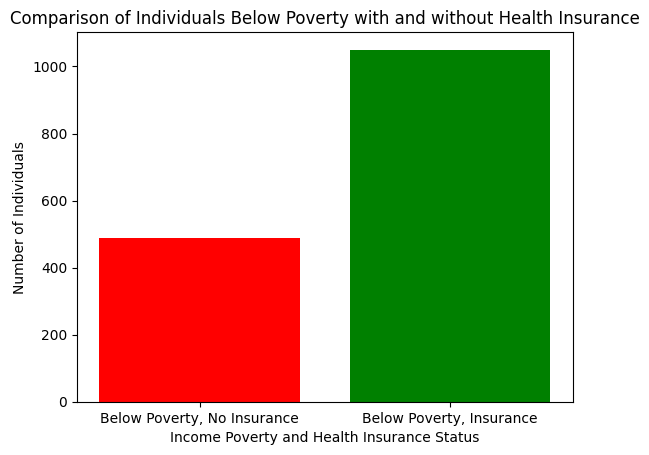

In [31]:
belowPovNoInsur_df = vaccines_df[(vaccines_df['income_poverty'] == 'Below Poverty') & (vaccines_df['health_insurance'] == 0)]
belowPovInsur_df = vaccines_df[(vaccines_df['income_poverty'] == 'Below Poverty') & (vaccines_df['health_insurance'] == 1)]

# Count the number of rows in each DataFrame
belowPovNoInsur_count = len(belowPovNoInsur_df)
belowPovInsur_count = len(belowPovInsur_df)

# Labels and values for the bar chart
labels = ['Below Poverty, No Insurance', 'Below Poverty, Insurance']
values = [belowPovNoInsur_count, belowPovInsur_count]

# Create a bar chart
plt.bar(labels, values, color=['red', 'green'])
plt.xlabel('Income Poverty and Health Insurance Status')
plt.ylabel('Number of Individuals')
plt.title('Comparison of Individuals Below Poverty with and without Health Insurance')
plt.show()

Next I'll turn float values into int 

AJ

I am a little stuck here as everything I am trying isnt working. Each cell below is a different atttempt. They are independent of each other and if I can get one to work i will delete the others. I was just trying to change the float values to integers.

Ok so I finally figured it out and got it working below is the code. I removed the rest of the attempts.

In [32]:
# Identify columns with float values
float_columns = vaccines_df.select_dtypes(include='float64').columns

# Round float values to remove the decimal part and convert to integers
vaccines_df[float_columns] = vaccines_df[float_columns].round().astype('Int64')


In [33]:
vaccines_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,household_adults,household_children
0,26707,2,2,0,1,0,1,1,0,1,...,1,1,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,1,0
1,26708,1,1,0,0,0,0,0,0,0,...,1,1,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,3,0
2,26709,2,2,0,0,1,1,1,1,1,...,4,4,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,1,0
3,26710,1,1,0,0,0,0,0,0,0,...,4,2,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,1,0
4,26711,3,1,1,1,0,1,1,1,1,...,4,2,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,0,1


In [34]:
vaccines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   respondent_id                26708 non-null  int64 
 1   h1n1_concern                 26623 non-null  Int64 
 2   h1n1_knowledge               26586 non-null  Int64 
 3   behavioral_antiviral_meds    26629 non-null  Int64 
 4   behavioral_avoidance         26495 non-null  Int64 
 5   behavioral_face_mask         26689 non-null  Int64 
 6   behavioral_wash_hands        26668 non-null  Int64 
 7   behavioral_large_gatherings  26636 non-null  Int64 
 8   behavioral_outside_home      26626 non-null  Int64 
 9   behavioral_touch_face        26580 non-null  Int64 
 10  doctor_recc_h1n1             24548 non-null  Int64 
 11  doctor_recc_seasonal         24548 non-null  Int64 
 12  chronic_med_condition        25776 non-null  Int64 
 13  child_under_6_months         25

Here Ill looking to see how many people are and arent healthcare workers. I feel like ayone who is will automatically be getting both vaccinations regardless of there other responses.

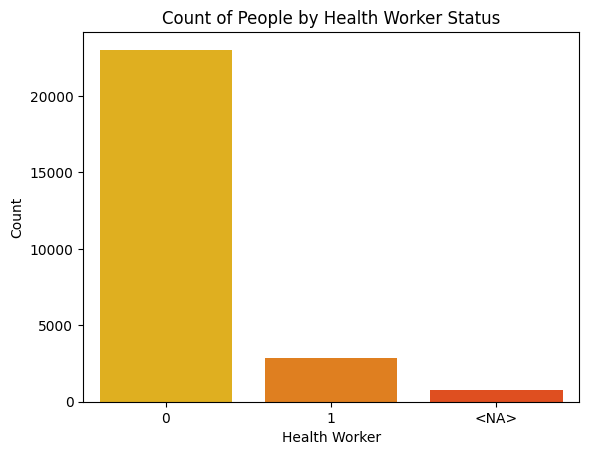

In [35]:
# Create a copy of the original DataFrame
vaccines_df_copy = vaccines_df.copy()

# Convert 'health_worker' column to string type in the copied DataFrame
vaccines_df_copy['health_worker'] = vaccines_df_copy['health_worker'].astype(str)

# Replace missing values in the 'health_worker' column with 'Unknown'
vaccines_df_copy['health_worker'].fillna('Unknown', inplace=True)


# Plotting (optional)
sns.countplot(x='health_worker', data=vaccines_df_copy, palette='autumn_r')
plt.xlabel('Health Worker')
plt.ylabel('Count')
plt.title('Count of People by Health Worker Status')
plt.show()

In [ ]:
sns.countplot(x='health_worker', data=vaccines_df, palette='autumn_r')
plt.xlabel('Health Worker')
plt.ylabel('Count')
plt.title('Count of how many people are health workers')
plt.show()

The non Health care workers out number the people who are around 10 to 1. 


6.0. Saving out the dataframe for next steps

In [37]:

vaccines_df.to_csv('vaccines_df.csv', index=False)

7.0. Summary

In this notebook I loaded the data as a dataframe, checked to see what missing values were in the data, changed some of the float values to int just to make them a little neater. I also removed a few columns that had data that I wouldnt have been able to use as it looks like I would need a key to understand it, which I dont have.